## Hurricane Frequencies

This script plots the hurricane frequency as a function of year between 1851-2023. 

There is an apparent increase in the frequency of hurricanes with time over the full time range of this period, but research by 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('data/hurdat2.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54749 entries, 0 to 54748
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CycloneID      54749 non-null  string        
 1   Year           54749 non-null  int32         
 2   Name           54749 non-null  string        
 3   Entries        54749 non-null  int64         
 4   Month          54749 non-null  int32         
 5   Day            54749 non-null  int32         
 6   Hours          54749 non-null  int32         
 7   Minutes        54749 non-null  int32         
 8   RecordID       54749 non-null  string        
 9   Status         54749 non-null  string        
 10  Latitude       54749 non-null  float64       
 11  Longitude      54749 non-null  float64       
 12  LonHemisphere  54749 non-null  string        
 13  MaxWind        54749 non-null  int64         
 14  MinPressure    54749 non-null  int64         
 15  34NE           5474

In [4]:
df.head()

,CycloneID,Year,Name,Entries,Month,Day,Hours,Minutes,RecordID,Status,...,50NE,50SE,50SW,50NW,64NE,64SE,64SW,64NW,RadiusMaxWind,Datetime
0,01,1851,UNNAMED,14,6,25,0,0,,HU,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 00:00:00
1,01,1851,UNNAMED,14,6,25,6,0,,HU,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 06:00:00
2,01,1851,UNNAMED,14,6,25,12,0,,HU,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 12:00:00
3,01,1851,UNNAMED,14,6,25,18,0,,HU,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 18:00:00
4,01,1851,UNNAMED,14,6,25,21,0,L,HU,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 21:00:00


In [5]:
df[df.Year == 2023]['Name'].unique()

<StringArray>
[   'UNNAMED',     'ARLENE',       'BRET',      'CINDY',        'DON',
       'GERT',      'EMILY',   'FRANKLIN',     'HAROLD',     'IDALIA',
       'JOSE',      'KATIA',        'LEE',     'MARGOT',      'NIGEL',
    'OPHELIA',   'PHILIPPE',       'RINA',       'SEAN',      'TAMMY',
 'TWENTY-ONE']
Length: 21, dtype: string

In [6]:
pd.DataFrame(df.groupby(['Year', 'CycloneID']).agg('count'))

Name  Entries  Month  Day  Hours  Minutes  RecordID  Status  \
Year CycloneID                                                                
1851 01           14       14     14   14     14       14        14      14   
     02            1        1      1    1      1        1         1       1   
     03            1        1      1    1      1        1         1       1   
     04           49       49     49   49     49       49        49      49   
     05           16       16     16   16     16       16        16      16   
...              ...      ...    ...  ...    ...      ...       ...     ...   
2023 17           54       54     54   54     54       54        54      54   
     18           16       16     16   16     16       16        16      16   
     19           25       25     25   25     25       25        25      25   
     20           54       54     54   54     54       54        54      54   
     21            6        6      6    6      6        6         6       6   

                Latitude  Longitude  ...  50NE  50SE  50SW  50NW  64NE  64SE  \
Year CycloneID                       ...                                       
1851 01               14         14  ...    14    14    14    14    14    14   
     02                1          1  ...     1     1     1     1     1     1   
     03                1          1  ...     1     1     1     1     1     1   
     04               49         49  ...    49    49    49    49    49    49   
     05               16         16  ...    16    16    16    16    16    16   
...                  ...        ...  ...   ...   ...   ...   ...   ...   ...   
2023 17               54         54  ...    54    54    54    54    54    54   
     18               16         16  ...    16    16    16    16    16    16   
     19               25         25  ...    25    25    25    25    25    25   
     20               54         54  ...    54    54    54    54    54    54   
     21                6          6  ...     6     6     6     6     6     6   

                64SW  64NW  RadiusMaxWind  Datetime  
Year CycloneID                                       
1851 01           14    14             14        14  
     02            1     1              1         1  
     03            1     1              1         1  
     04           49    49             49        49  
     05           16    16             16        16  
...              ...   ...            ...       ...  
2023 17           54    54             54        54  
     18           16    16             16        16  
     19           25    25             25        25  
     20           54    54             54        54  
     21            6     6              6         6  

[1975 rows x 27 columns]

In [7]:
# n_cyclones = pd.DataFrame(df.groupby(['Year', 'CycloneID']).agg('count')['CycloneID']).reset_index()

In [8]:
n_cyclones = df.groupby('Year')['CycloneID'].nunique().reset_index()

In [9]:
# pd.DataFrame(df.groupby(['Year', 'CycloneID']).agg('count')).reset_index()[['Year', 'CycloneID']]

In [10]:
# df.groupby('Year')['CycloneID'].nunique().reset_index()

In [11]:
# pd.DataFrame(df.groupby(['Year']).agg('count')['CycloneID']).reset_index()

In [12]:
# n_cyclones = n_cyclones.rename(columns={'Name': 'n_cyclones'})

In [13]:
n_cyclones

,Year,CycloneID
0,1851,6
1,1852,5
2,1853,8
3,1854,5
4,1855,5
...,...,...
168,2019,20
169,2020,31
170,2021,21
171,2022,16


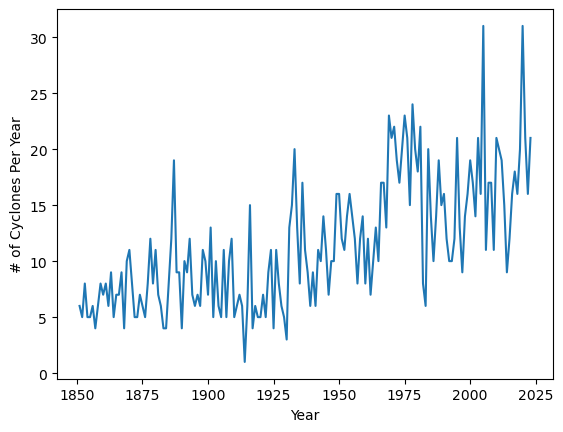

In [14]:
sns.lineplot(data=n_cyclones, x='Year', y='CycloneID')
plt.ylabel('# of Cyclones Per Year');

There is an apparent increase in the number of cyclones per year in the Atlantic basin, however this is due to sampling differences over the years. In early times, hurricanes were only known about and recorded if they made landfall.

<AxesSubplot: xlabel='Year', ylabel='CycloneID'>

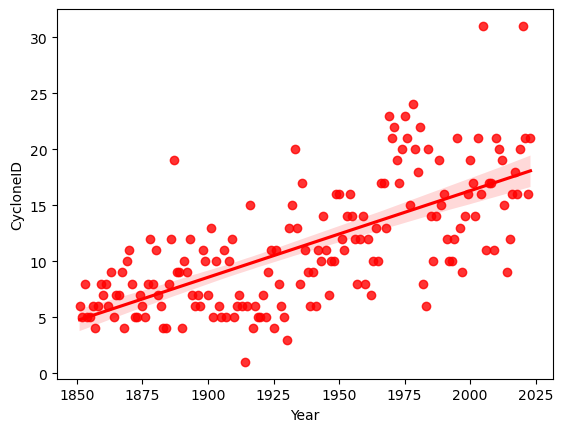

In [15]:
sns.regplot(data=n_cyclones, x='Year', y='CycloneID', scatter=True, color='red')

Recent work by Vecchi et al. (2021) suggests that reliable data for hurricane frequency begins around 1972, and coincides with the advent of satellite imaging. Unless an Atlantic hurricane made landfall, it was not known about, so the true number of hurricanes in the past was higher than the number recorded in the hurdat2 dataset. 

Below I will repeat this with data from 1972-present.

<AxesSubplot: xlabel='Year', ylabel='CycloneID'>

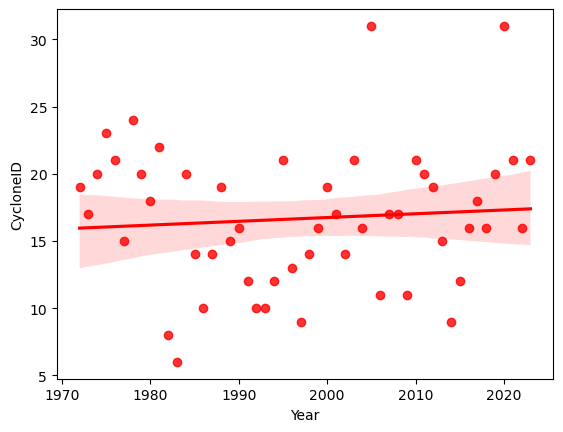

In [16]:
sns.regplot(data=n_cyclones.loc[n_cyclones.Year >= 1972], x='Year', y='CycloneID', scatter=True, color='red')

C:\Users\patri\AppData\Local\Temp\ipykernel_21176\955032604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_cyclones_filtered['15yr_avg'] = n_cyclones_filtered['CycloneID'].rolling(window=15).mean()


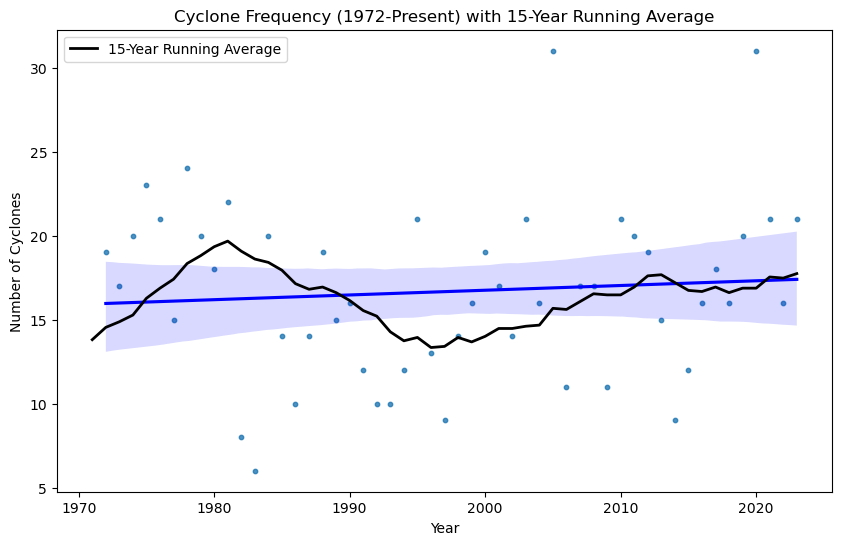

In [19]:
n_cyclones_filtered = n_cyclones[n_cyclones['Year'] >= 1972-15]

# Create a 15-year rolling average for CycloneCount
n_cyclones_filtered['15yr_avg'] = n_cyclones_filtered['CycloneID'].rolling(window=15).mean()

# Plotting the regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='CycloneID', data=n_cyclones_filtered.loc[n_cyclones['Year'] >= 1972], scatter_kws={"s": 10}, line_kws={"color": "blue"})

# Adding the 15-year running average line in black
plt.plot(n_cyclones_filtered['Year'], n_cyclones_filtered['15yr_avg'], color='black', linewidth=2, label='15-Year Running Average')

# Customize and show plot
plt.xlabel('Year')
plt.ylabel('Number of Cyclones')
plt.title('Cyclone Frequency (1972-Present) with 15-Year Running Average')
plt.legend()
plt.show()

Let's fit a linear regression model to see if the slope measured is consistent with 0.

In [20]:
from scipy.stats import linregress

In [22]:
n_cyclones_filtered = n_cyclones[n_cyclones['Year'] >= 1972]

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(n_cyclones_filtered['Year'], n_cyclones_filtered['CycloneID'])

# Print results to evaluate if the slope is consistent with no slope
print(f"Slope: {slope}")
print(f"P-value: {p_value}")

# Decision based on p-value
if p_value > 0.05:
    print("The slope is not significantly different from zero (consistent with no slope).")
else:
    print("The slope is significantly different from zero.")

Slope: 0.028131136344232904
P-value: 0.5591350824380359
The slope is not significantly different from zero (consistent with no slope).


The linear fit of data since 1972 is statistically consistent with no increase with time.